## Explore Weather Data: From Stations Around the Wind Farms
### *This notebook performs exploratory data analysis on downloaded weather data*

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.interpolate import spline
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import pickle
import random

In [95]:
project_name = "Thunder Ranch"
feature_name = "AWND"

In [96]:
def get_projects(basepath_flag = True):
    base_path = './data/weather/projects/*'
    projects =  glob.glob(base_path)
    if basepath_flag:
        return([os.path.basename(s) for s in projects])
    else:
        return(projects)

In [97]:
def get_project_stations(project_name):
    project_name = project_name.replace("/","&")
    base_path = './data/weather/projects/'
    search_path = base_path + project_name + '/*'
    project_station_dir =  glob.glob(search_path)
    return([os.path.basename(s) for s in project_station_dir])

In [98]:
def get_features_project_stations(project_name, stationid, basepath_flag = True):
    project_name = project_name.replace("/","&")
    stationid = stationid.replace(":", "_")
    base_path = './data/weather/projects/'
    station_weather_features = glob.glob(base_path + project_name + '/' + stationid + '/*.csv')
    if basepath_flag:
        return([os.path.basename(s).replace('.csv', '') for s in station_weather_features])
    else:
        return(station_weather_features)

In [99]:
def get_data_features_project_stations(project_name, stationid, feature):
    project_name = project_name.replace("/","&")
    stationid = stationid.replace(":", "_")
    base_path = './data/weather/projects/'
    #feature_name = feature.split("_")[0]
    #print(feature_name)
    feature_path = base_path + project_name + '/' + stationid + '/' + feature + '.csv'
    return(pd.read_csv(feature_path))

In [100]:
all_data = pd.DataFrame()
collected_projects = get_projects(basepath_flag=True)
for p in collected_projects:
    project_stations = get_project_stations(p)
    for s in project_stations:
        station_features = get_features_project_stations(p, s)
        for f in station_features:
            data = get_data_features_project_stations(p, s, f)
            data['p_name'] = p
            all_data = all_data.append(data)

In [101]:
all_data.shape

(239059, 6)

In [102]:
all_data.head()

,attributes,datatype,date,station,value,p_name
0,",,W,",AWND,2017-01-01T00:00:00,GHCND:USW00014748,6.0,Armenia Mountain
1,",,W,",AWND,2017-01-02T00:00:00,GHCND:USW00014748,2.9,Armenia Mountain
2,",,W,",AWND,2017-01-03T00:00:00,GHCND:USW00014748,2.9,Armenia Mountain
3,",,W,",AWND,2017-01-04T00:00:00,GHCND:USW00014748,15.9,Armenia Mountain
4,",,W,",AWND,2017-01-05T00:00:00,GHCND:USW00014748,12.5,Armenia Mountain


#### Plot weather data

In [111]:
stationids = get_project_stations(project_name)
s = stationids[1]
wind_features = get_features_project_stations(project_name, s)
f = wind_features[-1]

In [141]:
def plot_weather_feature_time_series(project_name, station, feature):
    df = get_data_features_project_stations(project_name, station, feature)
    df.index = pd.to_datetime(df['date'])
    plt.figure(figsize=(10,7))
    #df['value'].plot()
    #print(df)
    lowess = sm.nonparametric.lowess
    data = lowess(df["value"], df.index)
    #print(data)
    #plt.plot(data[:, 0], data[:, 1])
    plt.plot(df["value"])

[[1.48322880e+18 2.69460957e+01]
 [1.48331520e+18 2.69655646e+01]
 [1.48340160e+18 2.69848583e+01]
 [1.48348800e+18 2.70039748e+01]
 [1.48357440e+18 2.70229121e+01]
 [1.48366080e+18 2.70416681e+01]
 [1.48374720e+18 2.70602410e+01]
 [1.48383360e+18 2.70786292e+01]
 [1.48392000e+18 2.70968318e+01]
 [1.48400640e+18 2.71148473e+01]
 [1.48409280e+18 2.71326742e+01]
 [1.48417920e+18 2.71503105e+01]
 [1.48426560e+18 2.71677538e+01]
 [1.48435200e+18 2.71850018e+01]
 [1.48443840e+18 2.72020528e+01]
 [1.48452480e+18 2.72189051e+01]
 [1.48461120e+18 2.72355575e+01]
 [1.48469760e+18 2.72520088e+01]
 [1.48478400e+18 2.72682577e+01]
 [1.48487040e+18 2.72843037e+01]
 [1.48495680e+18 2.73001461e+01]
 [1.48504320e+18 2.73157844e+01]
 [1.48512960e+18 2.73312185e+01]
 [1.48521600e+18 2.73464477e+01]
 [1.48530240e+18 2.73614716e+01]
 [1.48538880e+18 2.73762895e+01]
 [1.48547520e+18 2.73909005e+01]
 [1.48556160e+18 2.74053039e+01]
 [1.48564800e+18 2.74194989e+01]
 [1.48573440e+18 2.74334850e+01]
 [1.485820

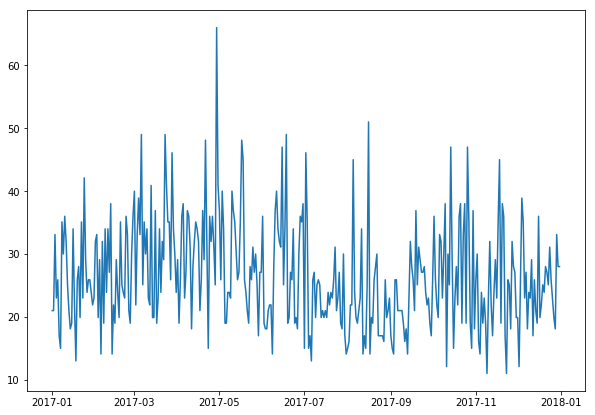

In [142]:
plot_weather_feature_time_series(project_name, s, f)

#### NOAA Weather Boxplots

In [22]:
all_weather_df = pickle.load(open("C:/Users/Jonas/Desktop/GE_Capstone/Data/all_weather_df.pickle", "rb"))
all_weather_df = all_weather_df.reset_index()
all_weather_df["project_station"] = all_weather_df["project"] + all_weather_df["station"]
project_dict = pickle.load(open("./data/project_dict.pickle", "rb"))

In [23]:
print("Unique Projects:", len(all_weather_df["project"].unique()))
print("Unique Stations:", len(all_weather_df["station"].unique()))
print("Unique Project Stations:", len(all_weather_df["project_station"].unique()))

Unique Projects: 396
Unique Stations: 277
Unique Project Stations: 766


In [24]:
feature = "AWND"
sample_size = 10
random_sample_stations_array = np.empty(shape=(0,2))
random_sample_stations_list = []

In [25]:
base_directory = "./data/weather/projects/"
while len(random_sample_stations_list) < sample_size:
    rand_project = random.choice(list(project_dict.keys()))
    rand_station = random.choice(project_dict[rand_project])
    if (feature + "_2017-01-01_2017-12-31.csv" in os.listdir(base_directory + rand_project + "/" + rand_station + "/")) and \
    (rand_station not in list(random_sample_stations_array[:,1])):
        random_sample_stations_array = np.append(random_sample_stations_array, np.array([[rand_project, rand_station]]), axis=0)
        random_sample_stations_list.append(rand_project + rand_station)

In [26]:
print(random_sample_stations_array)

[['Balko Wind' 'GHCND_USW00003030']
 ['Golden Acorn Casino' 'GHCND_USW00003178']
 ['Fossil Gulch Wind Park (Hagerman)' 'GHCND_USW00094178']
 ['Cumberland Rose' 'GHCND_USW00014933']
 ['Oliver III' 'GHCND_USW00024011']
 ['Tuscola Bay Wind' 'GHCND_USW00014845']
 ['Pilgrim Stage Station' 'GHCND_USW00004110']
 ['Whitewater Hill' 'GHCND_USW00093138']
 ['Hereford 1' 'GHCND_USW00023047']
 ['Wake' 'GHCND_USW00023042']]


In [27]:
sampled_stations_df = all_weather_df[all_weather_df["project_station"].isin(random_sample_stations_list)]
sampled_stations_df = sampled_stations_df[sampled_stations_df["datatype"] == feature]                               
print(sampled_stations_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3640 entries, 59252 to 1084111
Data columns (total 15 columns):
index                   3640 non-null int64
attributes              3640 non-null object
datatype                3640 non-null object
date                    3640 non-null object
station                 3640 non-null object
value                   3640 non-null float64
project                 3640 non-null object
location                3640 non-null object
station_lat             3640 non-null float64
station_long            3640 non-null float64
project_lat_mean        3640 non-null float64
project_long_mean       3640 non-null float64
distance_from_center    3640 non-null float64
square_diagonal         3640 non-null float64
project_station         3640 non-null object
dtypes: float64(7), int64(1), object(7)
memory usage: 455.0+ KB
None


In [28]:
median_by_location = sampled_stations_df.groupby("location")["value"].median().reset_index()
median_by_location = median_by_location.sort_values("value", ascending=False)
median_by_location["location"]

0                          AMARILLO AIRPORT, TX US
5             LUBBOCK INTERNATIONAL AIRPORT, TX US
3                  GUYMON MUNICIPAL AIRPORT, OK US
9    TWIN FALLS SUN VALLEY REGIONAL AIRPORT, ID US
2          DES MOINES INTERNATIONAL AIRPORT, IA US
7         SAGINAW MBS INTERNATIONAL AIRPORT, MI US
4                         JEROME CO AIRPORT, ID US
1                BISMARCK MUNICIPAL AIRPORT, ND US
6                         PALM SPRINGS ASOS, CA US
8                     SAN DIEGO BROWN FIELD, CA US
Name: location, dtype: object

Text(0.5,1,'Location by AWND')

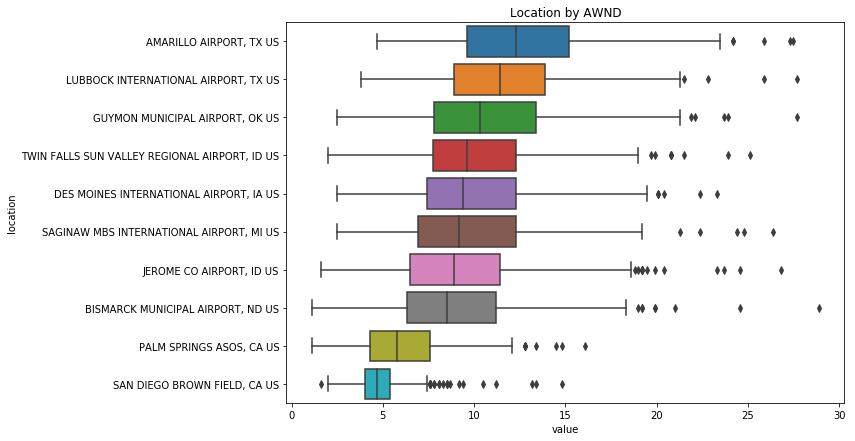

In [34]:
fig = plt.figure(figsize=(10,7))
ax = sns.boxplot(x="value", y="location", data=sampled_stations_df, order=median_by_location["location"])
ax.set_title("Location by " + feature)